## <b> Import modules

In [443]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from openpyxl import load_workbook
from matplotlib.gridspec import GridSpec

In [444]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [445]:
print(pd.__version__)

1.1.5


## <b> Import and process

### <b> pfam annotation process

In [446]:
p_annot = pd.read_csv('Partner_annot_pfam.csv', header = None)
p_annot.head()

,0,1,2,3,4,5,6
0,3P,None,None,None,None,None,3P-
1,6P,None,None,None,None,None,6P-
2,11P,None,None,None,None,None,11P-
3,18P,None,None,None,None,None,18P-
4,19P,None,None,None,None,None,19P-


In [447]:
# Sort the DataFrame based on the numeric part of the "Partner ID"
p_annot['SortKey'] = p_annot[0].str.extract('(\d+)').astype(int)  # Extract numeric part as a sort key
p_annot = p_annot.sort_values(by='SortKey').drop('SortKey', axis=1).reset_index()  # Sort and remove the temporary key column
p_annot = p_annot.drop(['index'], axis = 1)

In [448]:
p_annot.head()

,0,1,2,3,4,5,6
0,1P,3H,Pfam,PF03658,RnfH family Ubiquitin,RnfH protein,1P-Ub-RnfH
1,2P,2H,Pfam,PF03937,Flavinator of succinate dehydrogenase,Flavinator of succinate dehydrogenase,2P-Sdh5
2,3P,None,None,None,None,None,3P-
3,4P,4H,Pfam,PF10832,YhfG,FicA antitoxin homologue YhfG,4P-YhfG
4,5P,5H,Pfam,PF04657,"Putative inner membrane exporter, YdcZ","Putative inner membrane exporter, YdcZ",5P-DMT_YdcZ


In [449]:
p_annot.rename({0:'Partner Id', 1:'Hits', 2:'DB', 3:'pfam_ID', 4:'pfam_desc', 5:'interpro_desc', 6:'short_name'}, axis = 1, inplace = True)
p_annot.drop(['Hits', 'DB','pfam_ID', 'pfam_desc', 'interpro_desc'], axis = 1, inplace = True)
p_annot.head()

,Partner Id,short_name
0,1P,1P-Ub-RnfH
1,2P,2P-Sdh5
2,3P,3P-
3,4P,4P-YhfG
4,5P,5P-DMT_YdcZ


In [450]:
p_annot.to_csv('partner_pfam_annot_sorted.csv', index= False)

### <b> Antitoxin clusters

In [451]:
d = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/raw_files/partners.csv')
d = d.set_index('Strain')
print(d.shape)
d.head()

(950, 290)


,1P-Polyketide_cyc2,2P-Cpta_toxin,3P-Cpta_toxin,4P-Fic,5P-GNAT_acetyltran,6P-GNAT_acetyltran,7P-GnsAB_toxin,8P-Toxin_YhaV,9P-CbtA_toxin,10P-HipA_C-Couple_hipA,...,281P-ParE_toxin,282P-YafQ_toxin,283P-ParE_toxin,284P-CbtA_toxin,285P-HipA_C,286P-NTP_transf_2,287P-ParE_toxin,288P-HigB-like_toxin,289P-HipA_C,290P-CbtA_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,1,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,1,1,1,1,1,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ST000380050,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [452]:
#Save original datafram to excel file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/antitoxins_revised.xlsx"
d.to_excel(path, sheet_name='original_partners')

In [453]:
#presence absence table
d= d.apply(lambda x: [y if y <= 1 else 1 for y in x])
d.head()

,1P-Polyketide_cyc2,2P-Cpta_toxin,3P-Cpta_toxin,4P-Fic,5P-GNAT_acetyltran,6P-GNAT_acetyltran,7P-GnsAB_toxin,8P-Toxin_YhaV,9P-CbtA_toxin,10P-HipA_C-Couple_hipA,...,281P-ParE_toxin,282P-YafQ_toxin,283P-ParE_toxin,284P-CbtA_toxin,285P-HipA_C,286P-NTP_transf_2,287P-ParE_toxin,288P-HigB-like_toxin,289P-HipA_C,290P-CbtA_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ST000380050,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [454]:
#save presence absence table (unitary matrix) to excel file

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/antitoxins_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
d.to_excel(writer, sheet_name = 'partners_presence_absence')
writer.save()
writer.close()

In [455]:
#Add ST column
at_d = d.copy()
at_d['ST'] = at_d.index.str[2:-4].astype(int)
first_column = at_d.pop('ST')
at_d.insert(0, 'ST', first_column)
at_d.head()

,ST,1P-Polyketide_cyc2,2P-Cpta_toxin,3P-Cpta_toxin,4P-Fic,5P-GNAT_acetyltran,6P-GNAT_acetyltran,7P-GnsAB_toxin,8P-Toxin_YhaV,9P-CbtA_toxin,...,281P-ParE_toxin,282P-YafQ_toxin,283P-ParE_toxin,284P-CbtA_toxin,285P-HipA_C,286P-NTP_transf_2,287P-ParE_toxin,288P-HigB-like_toxin,289P-HipA_C,290P-CbtA_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,648,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000580141,58,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000380050,38,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [456]:
#total no of toxins 
a= at_d.reset_index()
a = a.drop('Strain', axis = 1)
a = a.set_index('ST')
a_sum = a.sum(axis = 1)
a_sum = a_sum.to_frame()
a_sum.rename(columns = {0:'Total no of antitoxins'}, inplace = True)
a_sum = a_sum.reset_index()
a_sum['ST'] = 'ST' + a_sum['ST'].astype(str)
a_sum.head()


,ST,Total no of antitoxins
0,ST167,30
1,ST648,27
2,ST73,26
3,ST58,23
4,ST38,44


In [457]:
#descriptive statistics
d_stat=  a_sum.groupby(['ST']).describe()
d_stat

Total no of antitoxins                                                 
                       count   mean       std   min    25%   50%    75%   max
ST                                                                           
ST10                    50.0  24.66  2.803860  16.0  25.00  25.0  26.75  30.0
ST101                   50.0  25.86  4.247496  18.0  23.00  24.0  29.00  34.0
ST11                    50.0  29.58  1.785314  26.0  28.00  29.0  31.00  34.0
ST117                   50.0  28.64  2.862566  25.0  26.00  28.5  30.75  35.0
ST12                    50.0  21.96  4.189199   0.0  20.25  22.0  24.00  30.0
ST127                   50.0  22.84  2.469074  19.0  21.00  22.0  24.00  30.0
ST131                   50.0  27.44  2.304919  21.0  26.00  27.5  29.00  31.0
ST155                   50.0  24.28  2.665272  17.0  23.00  24.0  26.00  29.0
ST156                   50.0  26.96  3.556885  21.0  24.00  27.0  28.75  35.0
ST167                   50.0  26.98  3.273206  20.0  25.00  27.0  29.00  34.0
ST38                    50.0  30.26  3.685659  24.0  28.00  30.0  32.75  44.0
ST405                   50.0  33.46  2.508842  28.0  32.00  34.0  35.00  38.0
ST410                   50.0  22.22  2.517611  16.0  21.00  23.0  23.75  28.0
ST48                    50.0  23.26  2.841457  18.0  21.25  23.0  25.75  28.0
ST58                    50.0  24.58  3.004011  19.0  22.00  24.5  27.00  31.0
ST648                   50.0  29.94  3.867235  23.0  26.00  30.0  32.50  42.0
ST69                    50.0  33.12  2.722844  26.0  32.00  33.0  35.00  39.0
ST73                    50.0  24.44  3.423568  19.0  22.00  24.0  25.00  34.0
ST95                    50.0  27.72  3.030727  22.0  26.00  27.0  29.00  37.0

In [458]:
#save total no of toxins per st and descriptive stat to excel to excel

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/antitoxins_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
a_sum.to_excel(writer, sheet_name = 'antitoxins_per_strain')
d_stat.to_excel(writer, sheet_name = 'descriptive_statistics')
writer.save()
writer.close()

In [459]:
at_d.shape

(950, 291)

## <b> Heatmap

In [460]:
#group by ST
genes =at_d.groupby(by=['ST'])

In [461]:
genes.head()

,ST,1P-Polyketide_cyc2,2P-Cpta_toxin,3P-Cpta_toxin,4P-Fic,5P-GNAT_acetyltran,6P-GNAT_acetyltran,7P-GnsAB_toxin,8P-Toxin_YhaV,9P-CbtA_toxin,...,281P-ParE_toxin,282P-YafQ_toxin,283P-ParE_toxin,284P-CbtA_toxin,285P-HipA_C,286P-NTP_transf_2,287P-ParE_toxin,288P-HigB-like_toxin,289P-HipA_C,290P-CbtA_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,648,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000580141,58,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000380050,38,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST001010119,101,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000110431,11,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ST001270049,127,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [462]:
# Write data from groups into individual dataframes
df_list=[]
for i in genes.groups:
    tag='ST'+str(i)+'_df'
    #print(tag)
    df_list.append(tag)
    globals()[tag] =pd.DataFrame(genes.get_group(i))
    print("Shape of {}:\t{}".format(tag,globals()[tag].shape))

Shape of ST10_df:	(50, 291)
Shape of ST11_df:	(50, 291)
Shape of ST12_df:	(50, 291)
Shape of ST38_df:	(50, 291)
Shape of ST48_df:	(50, 291)
Shape of ST58_df:	(50, 291)
Shape of ST69_df:	(50, 291)
Shape of ST73_df:	(50, 291)
Shape of ST95_df:	(50, 291)
Shape of ST101_df:	(50, 291)
Shape of ST117_df:	(50, 291)
Shape of ST127_df:	(50, 291)
Shape of ST131_df:	(50, 291)
Shape of ST155_df:	(50, 291)
Shape of ST156_df:	(50, 291)
Shape of ST167_df:	(50, 291)
Shape of ST405_df:	(50, 291)
Shape of ST410_df:	(50, 291)
Shape of ST648_df:	(50, 291)


In [463]:
df_list

['ST10_df',
 'ST11_df',
 'ST12_df',
 'ST38_df',
 'ST48_df',
 'ST58_df',
 'ST69_df',
 'ST73_df',
 'ST95_df',
 'ST101_df',
 'ST117_df',
 'ST127_df',
 'ST131_df',
 'ST155_df',
 'ST156_df',
 'ST167_df',
 'ST405_df',
 'ST410_df',
 'ST648_df']

In [464]:
ST10_df.tail(10)

,ST,1P-Polyketide_cyc2,2P-Cpta_toxin,3P-Cpta_toxin,4P-Fic,5P-GNAT_acetyltran,6P-GNAT_acetyltran,7P-GnsAB_toxin,8P-Toxin_YhaV,9P-CbtA_toxin,...,281P-ParE_toxin,282P-YafQ_toxin,283P-ParE_toxin,284P-CbtA_toxin,285P-HipA_C,286P-NTP_transf_2,287P-ParE_toxin,288P-HigB-like_toxin,289P-HipA_C,290P-CbtA_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST000101031,10,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000101026,10,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000100003,10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000100420,10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000100692,10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000100725,10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000100413,10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000101022,10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000100622,10,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [465]:
#ST10_df.to_csv('ST10.csv')

In [466]:
def t_percentage(df,tag):

    df_h=df.copy()
    #df_h.head()
    x=list(df_h.columns)
    #print(x)
    size=df_h.shape[0]
    #print(size)
    df_antitoxin=pd.DataFrame(columns=['antitoxins',tag])
    #print(df_antitoxin.head())
    for i in x:
        #print(df_h[i])
        s=df_h[i].astype(int).sum()
        #print(s)
        p=(s/size)*100
        #print(p)

        df_antitoxin = df_antitoxin.append({'antitoxins': i,tag:p}, ignore_index=True)
        #print(df_antitoxin)



    return(df_antitoxin)

In [467]:
t_percentage(d,12)

,antitoxins,12
0,1P-Polyketide_cyc2,99.894737
1,2P-Cpta_toxin,99.894737
2,3P-Cpta_toxin,99.894737
3,4P-Fic,99.684211
4,5P-GNAT_acetyltran,99.263158
...,...,...
285,286P-NTP_transf_2,0.105263
286,287P-ParE_toxin,0.105263
287,288P-HigB-like_toxin,0.105263
288,289P-HipA_C,0.105263


In [468]:
df_list

['ST10_df',
 'ST11_df',
 'ST12_df',
 'ST38_df',
 'ST48_df',
 'ST58_df',
 'ST69_df',
 'ST73_df',
 'ST95_df',
 'ST101_df',
 'ST117_df',
 'ST127_df',
 'ST131_df',
 'ST155_df',
 'ST156_df',
 'ST167_df',
 'ST405_df',
 'ST410_df',
 'ST648_df']

In [469]:
#Calculate percentage of gene presence in each ST
antitoxin_list=[]
for i in df_list:
    d=globals()[i].copy()
    d.drop('ST', axis=1,inplace=True)
    x=i.replace('df','at')
    y=i.replace('_df','')
    antitoxin_list.append(x)
    globals()[x]=t_percentage(d,y)
    print(x,globals()[x].shape)

ST10_at (290, 2)
ST11_at (290, 2)
ST12_at (290, 2)
ST38_at (290, 2)
ST48_at (290, 2)
ST58_at (290, 2)
ST69_at (290, 2)
ST73_at (290, 2)
ST95_at (290, 2)
ST101_at (290, 2)
ST117_at (290, 2)
ST127_at (290, 2)
ST131_at (290, 2)
ST155_at (290, 2)
ST156_at (290, 2)
ST167_at (290, 2)
ST405_at (290, 2)
ST410_at (290, 2)
ST648_at (290, 2)


In [470]:
ST155_at

,antitoxins,ST155
0,1P-Polyketide_cyc2,100.0
1,2P-Cpta_toxin,100.0
2,3P-Cpta_toxin,100.0
3,4P-Fic,100.0
4,5P-GNAT_acetyltran,96.0
...,...,...
285,286P-NTP_transf_2,0.0
286,287P-ParE_toxin,0.0
287,288P-HigB-like_toxin,0.0
288,289P-HipA_C,0.0


In [471]:
def merge_dataframe(list):
    l=list.copy()
    x=l.pop(0)
    x_df=globals()[x]
    for i in l:
        x_df=pd.merge(x_df,globals()[i],how='outer',on='antitoxins').fillna(0)
    return(x_df)

In [472]:
# Merge the dataframes
at_df=merge_dataframe(antitoxin_list)
at_df.head(10)

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,1P-Polyketide_cyc2,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,3P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,4P-Fic,98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
4,5P-GNAT_acetyltran,96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0
5,6P-GNAT_acetyltran,98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,12.0,100.0,100.0,100.0,100.0,100.0,96.0
6,7P-GnsAB_toxin,98.0,6.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0
7,8P-Toxin_YhaV,98.0,100.0,2.0,100.0,62.0,100.0,100.0,98.0,2.0,100.0,100.0,100.0,100.0,96.0,100.0,100.0,100.0,98.0,74.0
8,9P-CbtA_toxin,86.0,0.0,76.0,76.0,44.0,62.0,38.0,100.0,100.0,44.0,100.0,94.0,100.0,46.0,56.0,86.0,62.0,28.0,34.0
9,10P-HipA_C-Couple_hipA,96.0,2.0,92.0,100.0,92.0,78.0,100.0,88.0,92.0,100.0,100.0,92.0,94.0,98.0,100.0,100.0,2.0,98.0,0.0


In [473]:
at_df[['Partner Id','rest', 'k']] = at_df['antitoxins'].str.split('-',expand=True)

In [474]:
at_df.head()

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,...,ST131,ST155,ST156,ST167,ST405,ST410,ST648,Partner Id,rest,k
0,1P-Polyketide_cyc2,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1P,Polyketide_cyc2,None
1,2P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2P,Cpta_toxin,None
2,3P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,3P,Cpta_toxin,None
3,4P-Fic,98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,98.0,100.0,100.0,100.0,100.0,100.0,100.0,4P,Fic,None
4,5P-GNAT_acetyltran,96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,...,100.0,96.0,100.0,100.0,100.0,100.0,100.0,5P,GNAT_acetyltran,None


In [475]:
#add anotation to the partners
p_annot.head()

,Partner Id,short_name
0,1P,1P-Ub-RnfH
1,2P,2P-Sdh5
2,3P,3P-
3,4P,4P-YhfG
4,5P,5P-DMT_YdcZ


In [476]:
p_annot['short_name'] = p_annot['short_name'].apply(lambda x: x + 'UNKW' if x.endswith('-') else x)

In [477]:
#merge Pfam annotation
at_df=at_df.merge(p_annot, how='left', on='Partner Id')

In [478]:
at_df['Partner Id'] = at_df['Partner Id'].apply(lambda x: x + ')')
at_df['Partner Id'] = at_df['Partner Id'].apply(lambda x: '(' + x)

In [479]:
at_df.head()

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,...,ST155,ST156,ST167,ST405,ST410,ST648,Partner Id,rest,k,short_name
0,1P-Polyketide_cyc2,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(1P),Polyketide_cyc2,None,1P-Ub-RnfH
1,2P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(2P),Cpta_toxin,None,2P-Sdh5
2,3P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(3P),Cpta_toxin,None,3P-UNKW
3,4P-Fic,98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(4P),Fic,None,4P-YhfG
4,5P-GNAT_acetyltran,96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,...,96.0,100.0,100.0,100.0,100.0,100.0,(5P),GNAT_acetyltran,None,5P-DMT_YdcZ


In [480]:
at_df['short_name'] = at_df['short_name'] + ' '+ at_df['Partner Id']

In [481]:
at_df.head()

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,...,ST155,ST156,ST167,ST405,ST410,ST648,Partner Id,rest,k,short_name
0,1P-Polyketide_cyc2,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(1P),Polyketide_cyc2,None,1P-Ub-RnfH (1P)
1,2P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(2P),Cpta_toxin,None,2P-Sdh5 (2P)
2,3P-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(3P),Cpta_toxin,None,3P-UNKW (3P)
3,4P-Fic,98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,(4P),Fic,None,4P-YhfG (4P)
4,5P-GNAT_acetyltran,96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,...,96.0,100.0,100.0,100.0,100.0,100.0,(5P),GNAT_acetyltran,None,5P-DMT_YdcZ (5P)


In [482]:
# Split 'original_column' into two new columns
at_df[['k1', 'antitoxins']] = at_df['short_name'].str.split('-', n=1, expand=True)

In [483]:
at_df.drop(['Partner Id', 'rest', 'k', 'short_name', 'k1'], axis = 1, inplace = True)

In [484]:
at_df.head()

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,Ub-RnfH (1P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,Sdh5 (2P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,UNKW (3P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,YhfG (4P),98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
4,DMT_YdcZ (5P),96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0


In [485]:
at_df.tail()

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
285,AadA_C (286P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
286,RelB (287P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
287,HTH_3 (288P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
288,UNKW (289P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,CbtA_toxin (290P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [486]:
#at_df.to_csv('antitoxin_percentages.csv')

In [487]:
antitoxin_df=at_df.copy()
antitoxin_df.set_index('antitoxins',inplace=True)
antitoxin_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
antitoxins,,,,,,,,,,,,,,,,,,,
Ub-RnfH (1P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Sdh5 (2P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
UNKW (3P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
YhfG (4P),98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
DMT_YdcZ (5P),96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0


In [488]:
#antitoxin_df.to_csv('toxin_percentages.csv')


In [489]:
#Ssave toxin percentages to excel file

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/antitoxins_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
antitoxin_df.to_excel(writer, sheet_name = '%presence')
writer.save()
writer.close()

In [490]:
antitoxin_df.shape

(290, 19)

In [491]:
antitoxin_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
antitoxins,,,,,,,,,,,,,,,,,,,
Ub-RnfH (1P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Sdh5 (2P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
UNKW (3P),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
YhfG (4P),98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
DMT_YdcZ (5P),96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0


In [492]:
def select_rows(df):
    d1=df.copy()
    d2=pd.DataFrame()
    for index, row in d1.iterrows():
        score =0 
        #print(index)
        for i in d1.columns:
            
            if(row[i]>=20):
                #print(index, row[i] )
                score=score+1

        #print(index, score)
        
        if(score >0):
            d2=d2.append(d1.loc[index])
    return(d2)

In [493]:
new_df = select_rows(antitoxin_df)

In [494]:
new_df.shape

(101, 19)

In [495]:
new_df.head()

,ST10,ST101,ST11,ST117,ST12,ST127,ST131,ST155,ST156,ST167,ST38,ST405,ST410,ST48,ST58,ST648,ST69,ST73,ST95
Ub-RnfH (1P),100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Sdh5 (2P),100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
UNKW (3P),100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
YhfG (4P),98.0,100.0,100.0,100.0,98.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
DMT_YdcZ (5P),96.0,100.0,100.0,98.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0


In [496]:
print(p_annot.head(15))

   Partner Id           short_name
0          1P           1P-Ub-RnfH
1          2P              2P-Sdh5
2          3P              3P-UNKW
3          4P              4P-YhfG
4          5P          5P-DMT_YdcZ
5          6P              6P-UNKW
6          7P    7P-YmcE_antitoxin
7          8P    8P-PrlF_antitoxin
8          9P           9P-DUF5983
9         10P            10P-HTH_3
10        11P             11P-UNKW
11        12P  12P-PhdYeFM_antitox
12        13P   13P-MazE_antitoxin
13        14P  14P-HicB_lk_antitox
14        15P   15P-CbeA_antitoxin


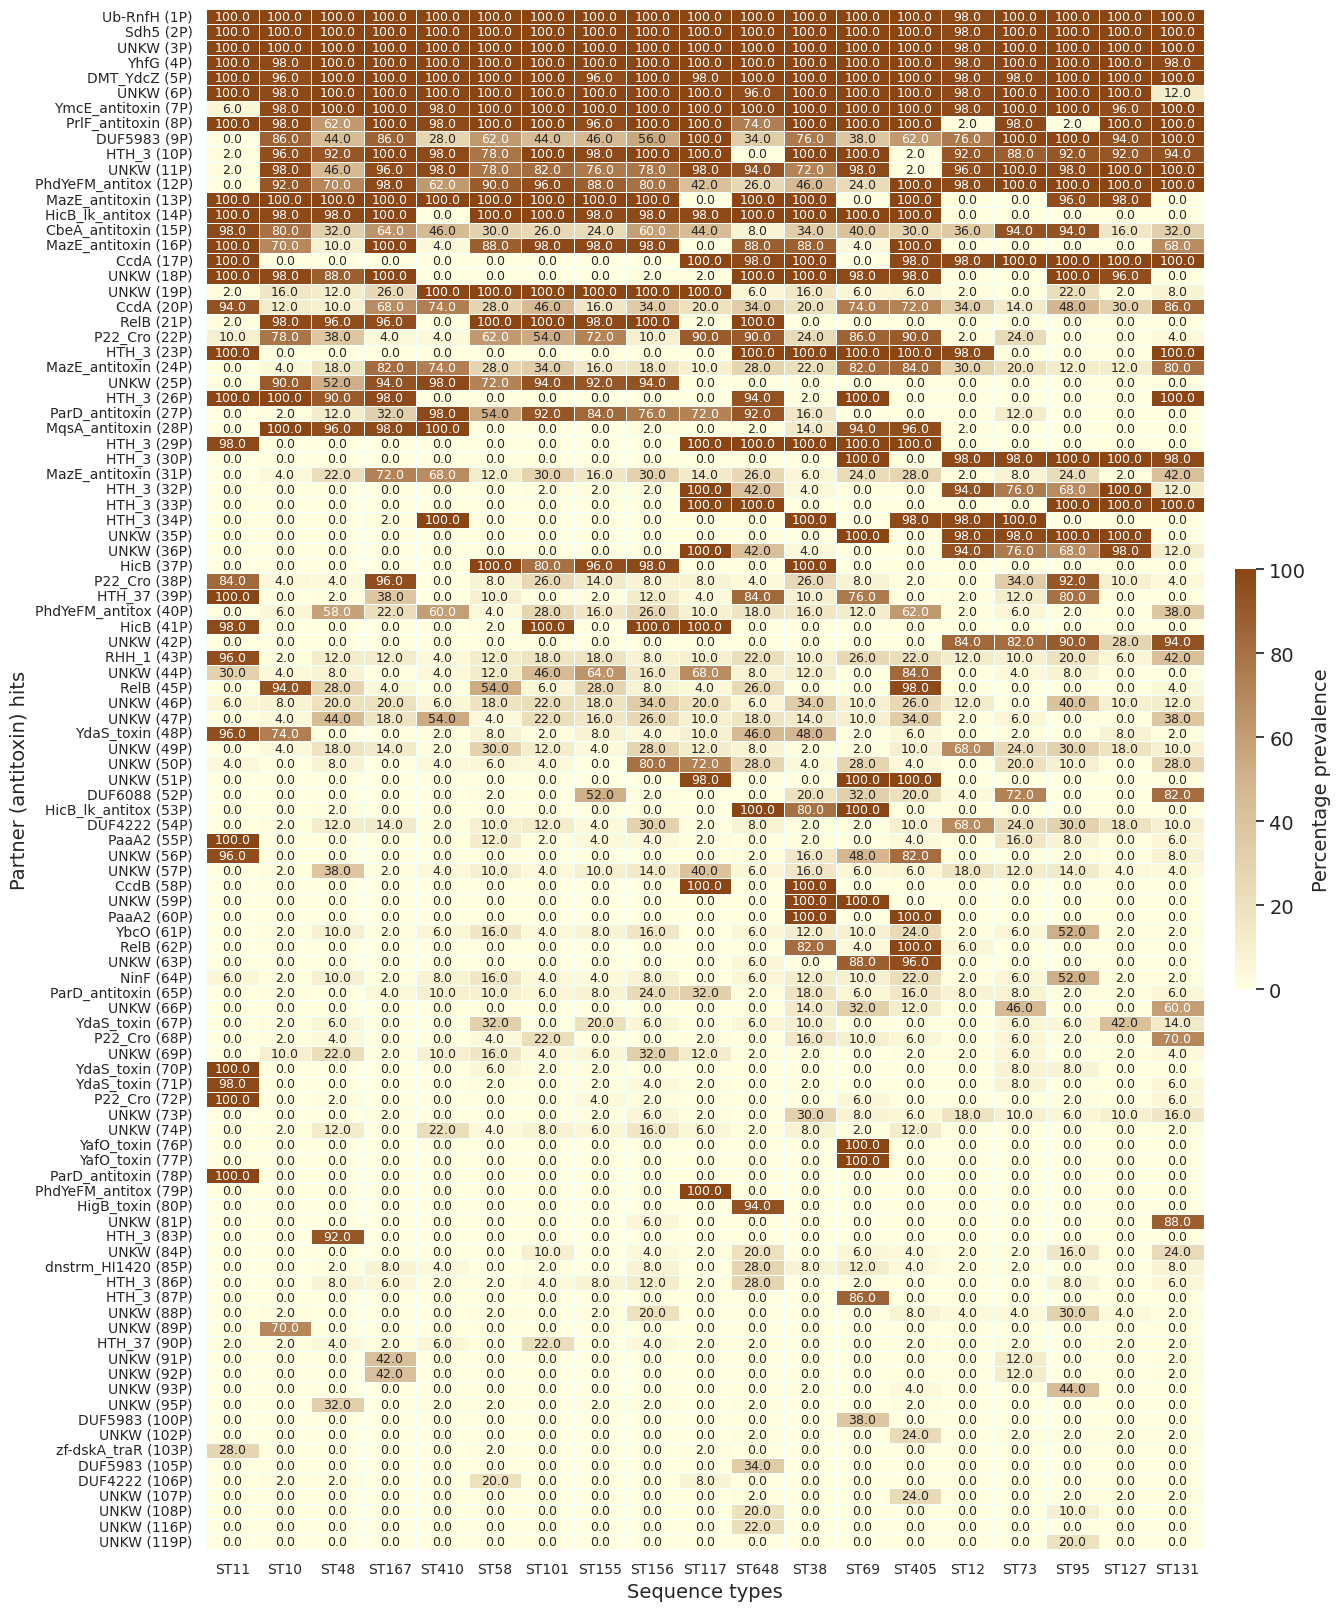

In [497]:
##For publication

# define ST order
ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']

# set font scale
sns.set(font_scale=0.8)

#set figure size 
plt.figure(figsize=(15, 20))

#ordered dataframe
new_df_order = new_df.reindex(columns=ST_new_order)

#set cmap
#cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
import matplotlib.colors as mcolors

# Adjust color points to create a smoother transition
colors = ['lightyellow', 'tan', 'saddlebrown']  # White to Light Red to Dark Red
#colors = ['whitesmoke', 'grey', 'black']  # White to Light Red to Dark Red
cmap = mcolors.LinearSegmentedColormap.from_list('azure_to_blue', colors)

# create heat map
sns.heatmap(new_df_order, xticklabels = ST_new_order,
            cmap = cmap, annot=True,
            fmt='.1f',annot_kws={"size": 9},
             cbar_kws={'orientation': 'vertical', 'fraction': 0.02, 'pad': 0.03, 'label': 'Percentage prevalence'},
            square=False, linewidths=0.5, linecolor='azure')

# Set colorbar font size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=14)
cbar.yaxis.label.set_size(14)

#increase fontsize of x and y ticks
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Add x-label and y-label
plt.xlabel("Sequence types", fontsize = 14)
plt.ylabel("Partner (antitoxin) hits", fontsize = 14)
plt.subplots_adjust(left=0.2)
# save and show the figure
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/publication/antitoxins-heatmap.tiff',
            #dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/supplemantary/antitoxins-heatmap.tiff', dpi=300)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/Revised_Images/Sfig2_revised.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/allimages/SFig2.jpg', dpi=300)
